In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
azeri_light = pd.read_excel('data/decomposition/azeri_light.xlsx')
brent = pd.read_excel('data/decomposition/brent.xls')
gdp = pd.read_csv('data/decomposition/gdp.csv')
loan_history = pd.read_csv('data/decomposition/loan_history.csv')


In [18]:
loan_history.rename(columns={'T_DMCREDITSUM':'loan_amount'},inplace=True)
loan_history['T_BDBEGINDATE'] = pd.to_datetime(loan_history['T_BDBEGINDATE'])
loan_history['month'] = loan_history['T_BDBEGINDATE'].dt.to_period('M')
loan_history['quarter'] = loan_history['T_BDBEGINDATE'].dt.to_period('Q')
loan_history['year'] = loan_history['T_BDBEGINDATE'].dt.year
loan_history = loan_history.query("year>=2020").sort_values('T_BDBEGINDATE')
loan_history = loan_history.groupby('quarter',as_index=False)['loan_amount'].sum()

azeri_light['Day'] = pd.to_datetime(azeri_light['Day'])
azeri_light['year']=azeri_light['Day'].dt.year
azeri_light['quarter'] = azeri_light['Day'].dt.to_period('Q')
azeri_light = azeri_light.query("year>=2020").sort_values('Day')

brent['Date'] = pd.to_datetime(brent['Date'])
brent['year'] = brent['Date'].dt.year
brent['quarter'] = brent['Date'].dt.to_period('Q')
brent = brent.query("year>=2020").sort_values('Date')

gdp.rename(columns={'Year':'year'},inplace=True)




In [ ]:
loan_history.

,quarter,loan_amount
0,2020Q1,4.747011e+07
1,2020Q2,1.658392e+07
2,2020Q3,5.202839e+07
3,2020Q4,2.701383e+07
4,2021Q1,5.351918e+07
5,2021Q2,7.509509e+07
6,2021Q3,7.148343e+07
7,2021Q4,7.906455e+07
8,2022Q1,7.295831e+07
9,2022Q2,1.049932e+08


KeyError: 'year'

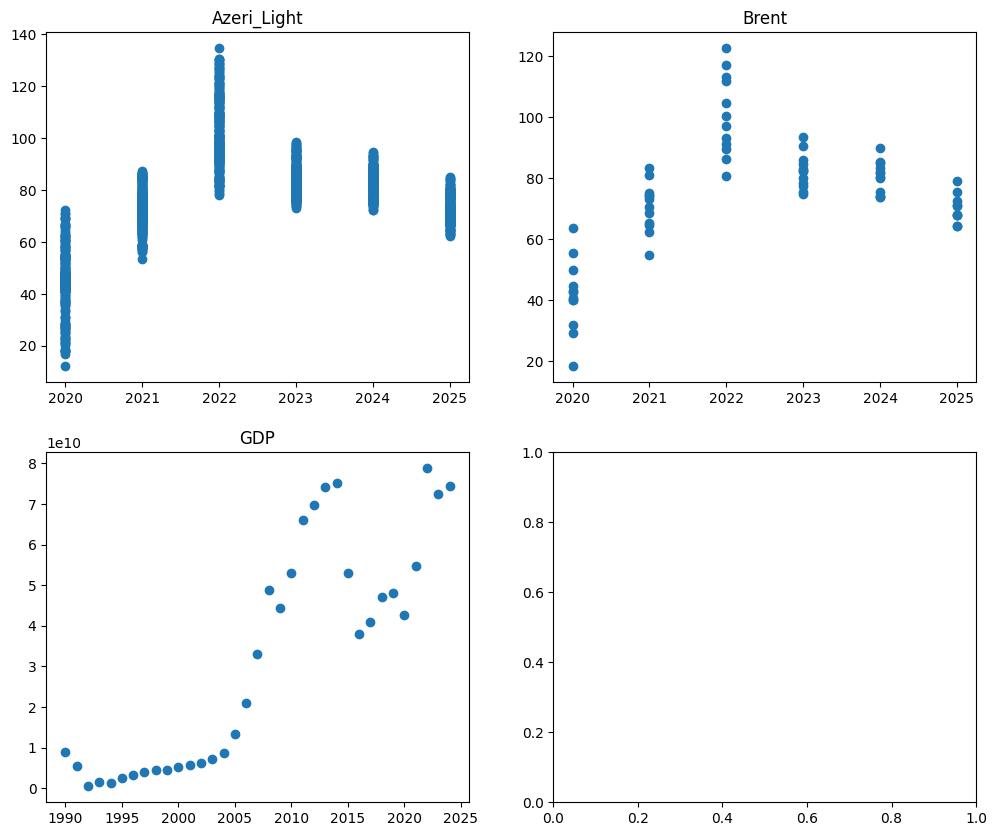

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(azeri_light['year'], azeri_light['Azeri_Light'])
axes[0, 0].set_title('Azeri_Light')

axes[0, 1].scatter(brent['year'], brent['price'])
axes[0, 1].set_title('Brent')

axes[1, 0].scatter(gdp['year'], gdp['GDP_current_USD'])
axes[1, 0].set_title('GDP')

axes[1, 1].scatter(loan_history['year'], loan_history['loan_amount'])
axes[1, 1].set_title('Loan Sales')

plt.tight_layout()
plt.show()
